### Import modules

In [1]:
import pandas as pd
import numpy as np
import os
%pylab
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm # to get the progess while loading the images
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img # to load images directly into numpy array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Load the dataset

In [2]:
BASE_DIR = r'C:\Users\user\CAPSTONE PROJECT\UTKFace'

In [3]:
# Labels --> Age, Gender, Ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    print(temp)
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender) 

  0%|          | 0/23708 [00:00<?, ?it/s]

['100', '0', '0', '20170112213500903.jpg.chip.jpg']
['100', '0', '0', '20170112215240346.jpg.chip.jpg']
['100', '1', '0', '20170110183726390.jpg.chip.jpg']
['100', '1', '0', '20170112213001988.jpg.chip.jpg']
['100', '1', '0', '20170112213303693.jpg.chip.jpg']
['100', '1', '0', '20170112215032192.jpg.chip.jpg']
['100', '1', '0', '20170117195420803.jpg.chip.jpg']
['100', '1', '0', '20170119212053665.jpg.chip.jpg']
['100', '1', '2', '20170105174847679.jpg.chip.jpg']
['100', '1', '2', '20170112213615815.jpg.chip.jpg']
['100', '1', '2', '20170112222336458.jpg.chip.jpg']
['101', '0', '0', '20170112213500903.jpg.chip.jpg']
['101', '1', '2', '20170105174739309.jpg.chip.jpg']
['103', '0', '2', '20170112213001988.jpg.chip.jpg']
['105', '0', '0', '20170112213001988.jpg.chip.jpg']
['105', '1', '0', '20170112213001988.jpg.chip.jpg']
['105', '1', '0', '20170112213021902.jpg.chip.jpg']
['105', '1', '0', '20170112213507183.jpg.chip.jpg']
['105', '1', '1', '20170112213303693.jpg.chip.jpg']
['10', '0', 

['1', '1', '2', '20161219200456451.jpg.chip.jpg']
['1', '1', '2', '20161219200539420.jpg.chip.jpg']
['1', '1', '2', '20161219201159932.jpg.chip.jpg']
['1', '1', '2', '20161219201453804.jpg.chip.jpg']
['1', '1', '2', '20161219202106997.jpg.chip.jpg']
['1', '1', '2', '20161219202514684.jpg.chip.jpg']
['1', '1', '2', '20161219202522028.jpg.chip.jpg']
['1', '1', '2', '20161219202727078.jpg.chip.jpg']
['1', '1', '2', '20161219202741628.jpg.chip.jpg']
['1', '1', '2', '20161219202852780.jpg.chip.jpg']
['1', '1', '2', '20161219202945116.jpg.chip.jpg']
['1', '1', '2', '20161219203303165.jpg.chip.jpg']
['1', '1', '2', '20161219203318222.jpg.chip.jpg']
['1', '1', '2', '20161219203352244.jpg.chip.jpg']
['1', '1', '2', '20161219203432220.jpg.chip.jpg']
['1', '1', '2', '20161219204304845.jpg.chip.jpg']
['1', '1', '2', '20161219204430596.jpg.chip.jpg']
['1', '1', '2', '20161219204523605.jpg.chip.jpg']
['1', '1', '2', '20161219204542005.jpg.chip.jpg']
['1', '1', '2', '20161219204636789.jpg.chip.jpg']


['24', '1', '0', '20170112234608449.jpg.chip.jpg']
['24', '1', '0', '20170112234658946.jpg.chip.jpg']
['24', '1', '0', '20170116000527997.jpg.chip.jpg']
['24', '1', '0', '20170116172723427.jpg.chip.jpg']
['24', '1', '0', '20170116174513932.jpg.chip.jpg']
['24', '1', '0', '20170116174738833.jpg.chip.jpg']
['24', '1', '0', '20170116205746244.jpg.chip.jpg']
['24', '1', '0', '20170116205900085.jpg.chip.jpg']
['24', '1', '0', '20170116205903763.jpg.chip.jpg']
['24', '1', '0', '20170116211847315.jpg.chip.jpg']
['24', '1', '0', '20170116211912644.jpg.chip.jpg']
['24', '1', '0', '20170116211933213.jpg.chip.jpg']
['24', '1', '0', '20170116214212261.jpg.chip.jpg']
['24', '1', '0', '20170116214224254.jpg.chip.jpg']
['24', '1', '0', '20170116214235749.jpg.chip.jpg']
['24', '1', '0', '20170116214311227.jpg.chip.jpg']
['24', '1', '0', '20170116214453175.jpg.chip.jpg']
['24', '1', '0', '20170116214532199.jpg.chip.jpg']
['24', '1', '0', '20170116215624769.jpg.chip.jpg']
['24', '1', '0', '2017011621563

['26', '1', '0', '20170117152703723.jpg.chip.jpg']
['26', '1', '0', '20170117152808211.jpg.chip.jpg']
['26', '1', '0', '20170117152955925.jpg.chip.jpg']
['26', '1', '0', '20170117153116669.jpg.chip.jpg']
['26', '1', '0', '20170117153202141.jpg.chip.jpg']
['26', '1', '0', '20170117153205725.jpg.chip.jpg']
['26', '1', '0', '20170117153211341.jpg.chip.jpg']
['26', '1', '0', '20170117153217757.jpg.chip.jpg']
['26', '1', '0', '20170117153717556.jpg.chip.jpg']
['26', '1', '0', '20170117154103821.jpg.chip.jpg']
['26', '1', '0', '20170117154814509.jpg.chip.jpg']
['26', '1', '0', '20170117154817805.jpg.chip.jpg']
['26', '1', '0', '20170117164030406.jpg.chip.jpg']
['26', '1', '0', '20170117170011666.jpg.chip.jpg']
['26', '1', '0', '20170117170217033.jpg.chip.jpg']
['26', '1', '0', '20170117170417131.jpg.chip.jpg']
['26', '1', '0', '20170117170847202.jpg.chip.jpg']
['26', '1', '0', '20170117171040563.jpg.chip.jpg']
['26', '1', '0', '20170117171130618.jpg.chip.jpg']
['26', '1', '0', '2017011717124

['28', '0', '3', '20170119194510275.jpg.chip.jpg']
['28', '0', '3', '20170119194510875.jpg.chip.jpg']
['28', '0', '3', '20170119194511483.jpg.chip.jpg']
['28', '0', '3', '20170119194512051.jpg.chip.jpg']
['28', '0', '3', '20170119194512651.jpg.chip.jpg']
['28', '0', '3', '20170119194513211.jpg.chip.jpg']
['28', '0', '3', '20170119194513954.jpg.chip.jpg']
['28', '0', '3', '20170119194514838.jpg.chip.jpg']
['28', '0', '3', '20170119194526899.jpg.chip.jpg']
['28', '0', '3', '20170119194554827.jpg.chip.jpg']
['28', '0', '3', '20170119194622939.jpg.chip.jpg']
['28', '0', '3', '20170119194624019.jpg.chip.jpg']
['28', '0', '3', '20170119194658235.jpg.chip.jpg']
['28', '0', '3', '20170119194719106.jpg.chip.jpg']
['28', '0', '3', '20170119194725939.jpg.chip.jpg']
['28', '0', '3', '20170119194726564.jpg.chip.jpg']
['28', '0', '3', '20170119194727459.jpg.chip.jpg']
['28', '0', '3', '20170119194803955.jpg.chip.jpg']
['28', '0', '3', '20170119194805417.jpg.chip.jpg']
['28', '0', '3', '2017011919480

['31', '0', '3', '20170104230610969.jpg.chip.jpg']
['31', '0', '3', '20170104230731169.jpg.chip.jpg']
['31', '0', '3', '20170104231444482.jpg.chip.jpg']
['31', '0', '3', '20170104232355440.jpg.chip.jpg']
['31', '0', '3', '20170104232701442.jpg.chip.jpg']
['31', '0', '3', '20170117181555388.jpg.chip.jpg']
['31', '0', '3', '20170119160307619.jpg.chip.jpg']
['31', '0', '3', '20170119195935948.jpg.chip.jpg']
['31', '0', '3', '20170119195940339.jpg.chip.jpg']
['31', '0', '3', '20170119195941627.jpg.chip.jpg']
['31', '0', '3', '20170119195948571.jpg.chip.jpg']
['31', '0', '3', '20170119195949283.jpg.chip.jpg']
['31', '0', '3', '20170119195949996.jpg.chip.jpg']
['31', '0', '3', '20170119195950692.jpg.chip.jpg']
['31', '0', '3', '20170119195952148.jpg.chip.jpg']
['31', '0', '3', '20170119195953620.jpg.chip.jpg']
['31', '0', '3', '20170119200050628.jpg.chip.jpg']
['31', '0', '3', '20170119200051395.jpg.chip.jpg']
['31', '0', '3', '20170119200052268.jpg.chip.jpg']
['31', '0', '3', '2017011921153

['35', '1', '0', '20170117154643574.jpg.chip.jpg']
['35', '1', '0', '20170117154901227.jpg.chip.jpg']
['35', '1', '0', '20170117170314803.jpg.chip.jpg']
['35', '1', '0', '20170117170527907.jpg.chip.jpg']
['35', '1', '0', '20170117170752436.jpg.chip.jpg']
['35', '1', '0', '20170117170821193.jpg.chip.jpg']
['35', '1', '0', '20170117170842874.jpg.chip.jpg']
['35', '1', '0', '20170117171423779.jpg.chip.jpg']
['35', '1', '0', '20170117174520494.jpg.chip.jpg']
['35', '1', '0', '20170117174759002.jpg.chip.jpg']
['35', '1', '0', '20170117174830232.jpg.chip.jpg']
['35', '1', '0', '20170117174927240.jpg.chip.jpg']
['35', '1', '0', '20170117175131343.jpg.chip.jpg']
['35', '1', '0', '20170117175625946.jpg.chip.jpg']
['35', '1', '0', '20170117180008549.jpg.chip.jpg']
['35', '1', '0', '20170117182534670.jpg.chip.jpg']
['35', '1', '0', '20170117182819269.jpg.chip.jpg']
['35', '1', '0', '20170117182902622.jpg.chip.jpg']
['35', '1', '0', '20170117182920141.jpg.chip.jpg']
['35', '1', '0', '2017011718301

['41', '0', '2', '20170116192512743.jpg.chip.jpg']
['41', '0', '2', '20170117154704827.jpg.chip.jpg']
['41', '0', '3', '20170104201116162.jpg.chip.jpg']
['41', '0', '3', '20170104215454077.jpg.chip.jpg']
['41', '0', '3', '20170104232812410.jpg.chip.jpg']
['41', '0', '3', '20170109140906863.jpg.chip.jpg']
['41', '0', '3', '20170119143544485.jpg.chip.jpg']
['41', '0', '3', '20170119162741678.jpg.chip.jpg']
['41', '0', '3', '20170119171541497.jpg.chip.jpg']
['41', '0', '3', '20170119171546296.jpg.chip.jpg']
['41', '0', '3', '20170119175402515.jpg.chip.jpg']
['41', '0', '3', '20170119181048675.jpg.chip.jpg']
['41', '0', '3', '20170119204219798.jpg.chip.jpg']
['41', '0', '3', '20170119204228535.jpg.chip.jpg']
['41', '0', '3', '20170119204231207.jpg.chip.jpg']
['41', '0', '3', '20170119204235487.jpg.chip.jpg']
['41', '0', '3', '20170119211820393.jpg.chip.jpg']
['41', '0', '4', '20170104173222571.jpg.chip.jpg']
['41', '0', '4', '20170104185252334.jpg.chip.jpg']
['41', '0', '4', '2017010420203

['50', '0', '3', '20170119205600824.jpg.chip.jpg']
['50', '0', '3', '20170119205603287.jpg.chip.jpg']
['50', '0', '3', '20170119211600321.jpg.chip.jpg']
['50', '0', '3', '20170119211935657.jpg.chip.jpg']
['50', '0', '4', '20170104210650526.jpg.chip.jpg']
['50', '0', '4', '20170105173144813.jpg.chip.jpg']
['50', '0', '4', '20170116224718413.jpg.chip.jpg']
['50', '0', '4', '20170117203102320.jpg.chip.jpg']
['50', '0', '4', '20170117203237079.jpg.chip.jpg']
['50', '0', '4', '20170117204155370.jpg.chip.jpg']
['50', '0', '4', '20170117204204793.jpg.chip.jpg']
['50', '1', '0', '20170103163657008.jpg.chip.jpg']
['50', '1', '0', '20170103183624314.jpg.chip.jpg']
['50', '1', '0', '20170103183831466.jpg.chip.jpg']
['50', '1', '0', '20170104165050048.jpg.chip.jpg']
['50', '1', '0', '20170104184846062.jpg.chip.jpg']
['50', '1', '0', '20170104185100237.jpg.chip.jpg']
['50', '1', '0', '20170104205235021.jpg.chip.jpg']
['50', '1', '0', '20170104213643230.jpg.chip.jpg']
['50', '1', '0', '2017010500141

['62', '1', '0', '20170110133917734.jpg.chip.jpg']
['62', '1', '0', '20170110140404141.jpg.chip.jpg']
['62', '1', '0', '20170110140759145.jpg.chip.jpg']
['62', '1', '0', '20170110141021529.jpg.chip.jpg']
['62', '1', '0', '20170110141039449.jpg.chip.jpg']
['62', '1', '0', '20170110143413907.jpg.chip.jpg']
['62', '1', '0', '20170110160643751.jpg.chip.jpg']
['62', '1', '0', '20170110160643766.jpg.chip.jpg']
['62', '1', '0', '20170110160643782.jpg.chip.jpg']
['62', '1', '0', '20170110160643798.jpg.chip.jpg']
['62', '1', '0', '20170110160643813.jpg.chip.jpg']
['62', '1', '0', '20170110160643829.jpg.chip.jpg']
['62', '1', '0', '20170110173800240.jpg.chip.jpg']
['62', '1', '0', '20170110173810498.jpg.chip.jpg']
['62', '1', '0', '20170110175644800.jpg.chip.jpg']
['62', '1', '0', '20170110175833643.jpg.chip.jpg']
['62', '1', '0', '20170110180540639.jpg.chip.jpg']
['62', '1', '0', '20170110180546671.jpg.chip.jpg']
['62', '1', '0', '20170110182008441.jpg.chip.jpg']
['62', '1', '0', '2017011018374

['85', '1', '0', '20170110155144403.jpg.chip.jpg']
['85', '1', '0', '20170110155147409.jpg.chip.jpg']
['85', '1', '0', '20170110173744770.jpg.chip.jpg']
['85', '1', '0', '20170110175649821.jpg.chip.jpg']
['85', '1', '0', '20170110175705728.jpg.chip.jpg']
['85', '1', '0', '20170110180123239.jpg.chip.jpg']
['85', '1', '0', '20170110180531278.jpg.chip.jpg']
['85', '1', '0', '20170110181049060.jpg.chip.jpg']
['85', '1', '0', '20170110181324285.jpg.chip.jpg']
['85', '1', '0', '20170110181543448.jpg.chip.jpg']
['85', '1', '0', '20170110181551074.jpg.chip.jpg']
['85', '1', '0', '20170110181554730.jpg.chip.jpg']
['85', '1', '0', '20170110181556802.jpg.chip.jpg']
['85', '1', '0', '20170110181606198.jpg.chip.jpg']
['85', '1', '0', '20170110181617775.jpg.chip.jpg']
['85', '1', '0', '20170110181621323.jpg.chip.jpg']
['85', '1', '0', '20170110181630306.jpg.chip.jpg']
['85', '1', '0', '20170110181632797.jpg.chip.jpg']
['85', '1', '0', '20170110181732789.jpg.chip.jpg']
['85', '1', '0', '2017011018174

In [4]:
# Convert to Dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.sample(5)

image  age  gender
19436  C:\Users\user\CAPSTONE PROJECT\UTKFace\55_1_0_...   55       1
15346  C:\Users\user\CAPSTONE PROJECT\UTKFace\40_0_0_...   40       0
3130   C:\Users\user\CAPSTONE PROJECT\UTKFace\21_1_0_...   21       1
18725  C:\Users\user\CAPSTONE PROJECT\UTKFace\53_0_3_...   53       0
15867  C:\Users\user\CAPSTONE PROJECT\UTKFace\41_0_0_...   41       0

In [5]:
# Map labels for gender
gender_dict = {0: 'Male', 1: 'Female'} # used in eda

### Exploratory Data Analysis

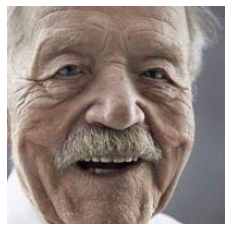

In [6]:
from PIL import Image, ImageOps
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<AxesSubplot:xlabel='age', ylabel='Density'>

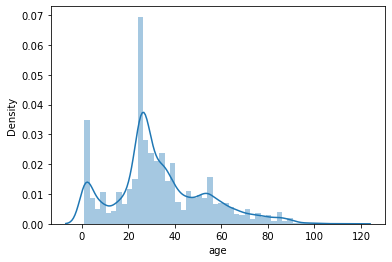

In [7]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='gender', ylabel='count'>

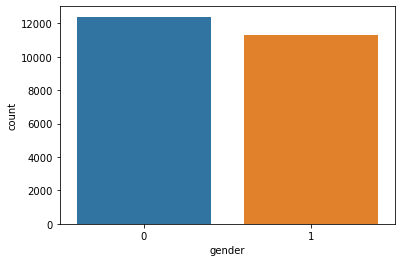

In [8]:
sns.countplot(df['gender'])

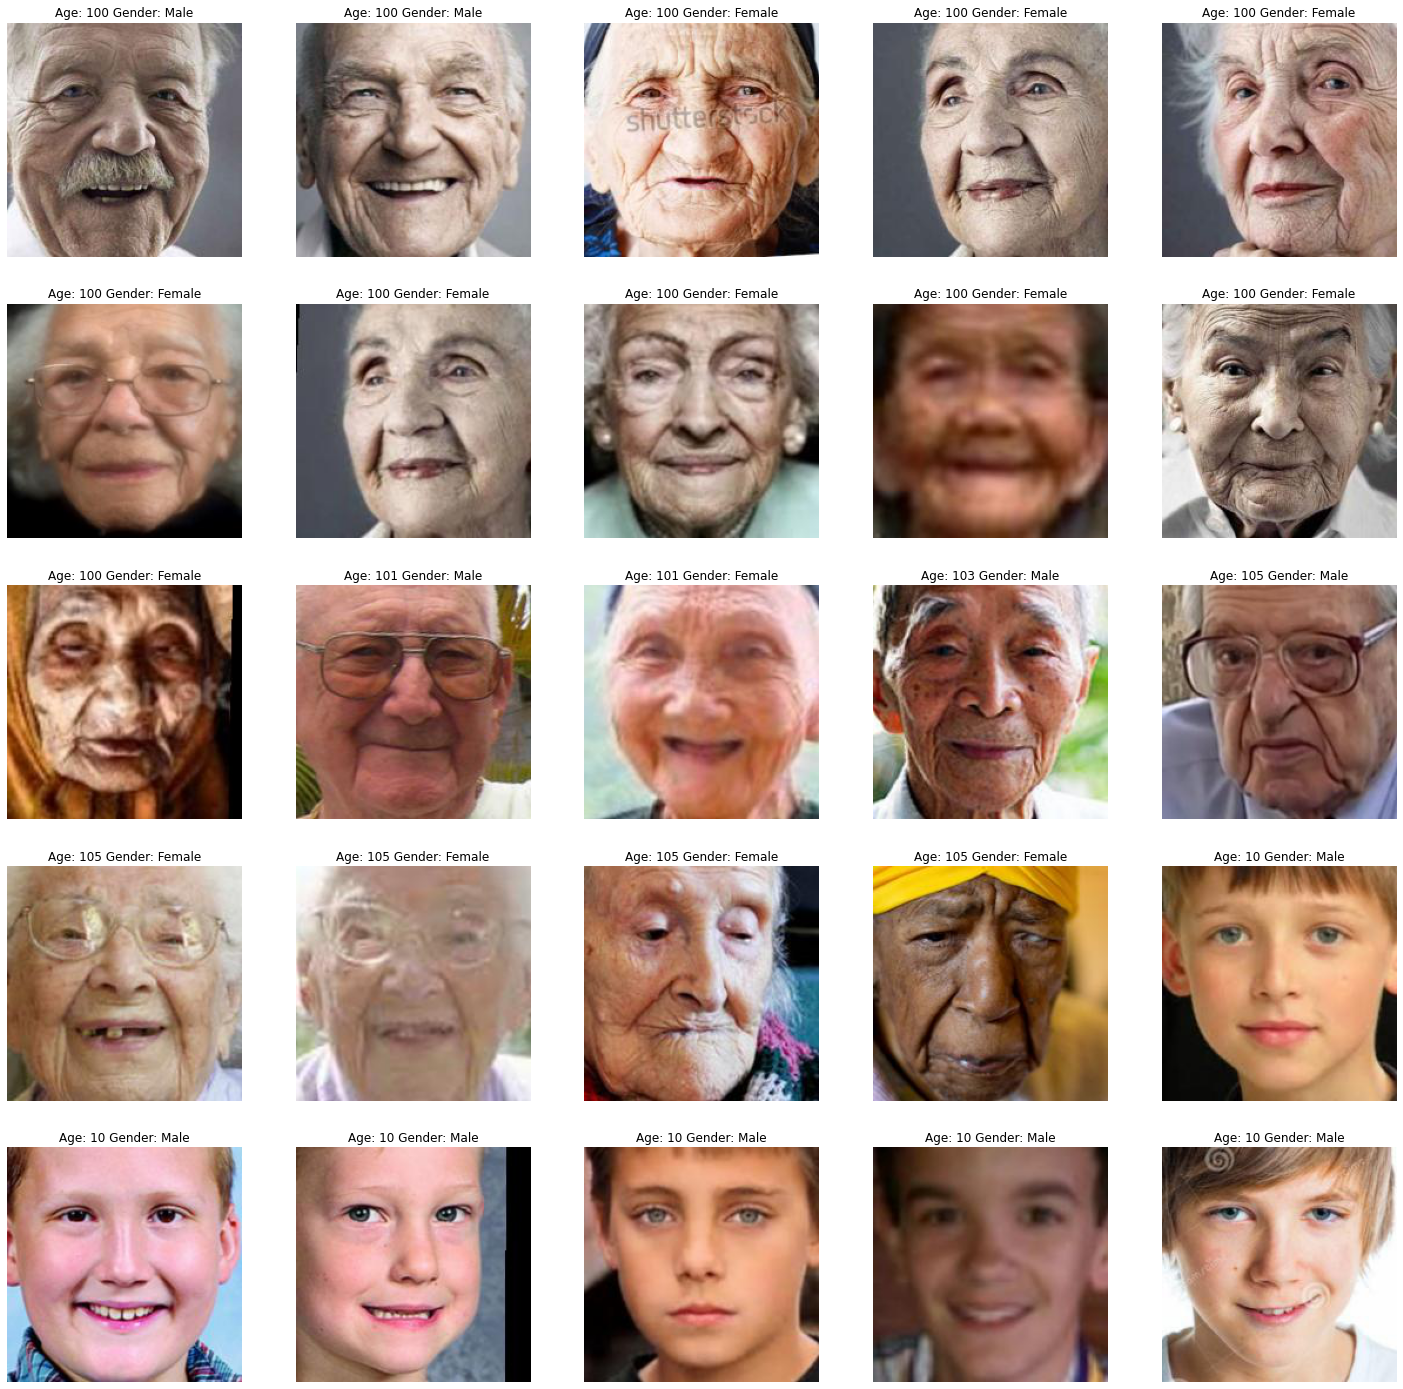

In [9]:
# To display grid of images
plt.figure(figsize(25,25))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f'Age: {age} Gender: {gender_dict[gender]}')
    plt.axis('off')

### Feature Extraction

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True) # grayscale-->converting images into 1 dim
        img = img.resize((128,128), Image.ANTIALIAS) # ANTIALIAS-->to avoid distortions during resizing
        img = np.array(img)
        features.append(img)
        
    features = np.array(features) # neural networks can handle only numpy array
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [11]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [12]:
X.shape

(23708, 128, 128, 1)

In [13]:
# Normalize the images
X = X/255.0 # pixel value is in the range [0,255] so normalizing it in the range of [0,1]

In [14]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [15]:
input_shape = (128, 128, 1)

### Model Creation

In [16]:
inputs = Input((input_shape))
# Convolutional layers
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

flatten = Flatten()(maxp_4) # for converting the weights into single dim vectors

# Fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1) # regularization
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], 
              optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

In [19]:
# Train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 308s 516ms/step - loss: 10.7247 - gender_out_loss: 0.6815 - age_out_loss: 10.0432 - gender_out_accuracy: 0.5499 - age_out_accuracy: 0.0581 - val_loss: 32.7930 - val_gender_out_loss: 0.5580 - val_age_out_loss: 32.2351 - val_gender_out_accuracy: 0.7149 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
593/593 [==============================] - 289s 488ms/step - loss: 7.9134 - gender_out_loss: 0.4531 - age_out_loss: 7.4603 - gender_out_accuracy: 0.7832 - age_out_accuracy: 0.0296 - val_loss: 29.1175 - val_gender_out_loss: 0.4986 - val_age_out_loss: 28.6189 - val_gender_out_accuracy: 0.7625 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
593/593 [==============================] - 286s 482ms/step - loss: 7.1568 - gender_out_loss: 0.3751 - age_out_loss: 6.7817 - gender_out_accuracy: 0.8282 - age_out_accuracy: 0.0157 - val_loss: 25.6047 - val_gender_out_loss: 0.5184 - val_age_out_loss: 25.0863 - val_gender_out_accuracy: 0.7647 - val_age_out_accur

593/593 [==============================] - 304s 512ms/step - loss: 3.4416 - gender_out_loss: 0.1034 - age_out_loss: 3.3383 - gender_out_accuracy: 0.9589 - age_out_accuracy: 0.0026 - val_loss: 18.7445 - val_gender_out_loss: 0.6143 - val_age_out_loss: 18.1301 - val_gender_out_accuracy: 0.8368 - val_age_out_accuracy: 0.0000e+00
Epoch 26/30
593/593 [==============================] - 299s 505ms/step - loss: 3.3780 - gender_out_loss: 0.1041 - age_out_loss: 3.2739 - gender_out_accuracy: 0.9587 - age_out_accuracy: 0.0025 - val_loss: 17.6661 - val_gender_out_loss: 0.7243 - val_age_out_loss: 16.9418 - val_gender_out_accuracy: 0.8418 - val_age_out_accuracy: 0.0000e+00
Epoch 27/30
593/593 [==============================] - 333s 562ms/step - loss: 3.2868 - gender_out_loss: 0.0957 - age_out_loss: 3.1910 - gender_out_accuracy: 0.9597 - age_out_accuracy: 0.0020 - val_loss: 18.1708 - val_gender_out_loss: 0.7554 - val_age_out_loss: 17.4154 - val_gender_out_accuracy: 0.8402 - val_age_out_accuracy: 0.0000

In [20]:
# Save the model to disk
model.save('AgeAndGenderDetection.hdf5')

### Plot the results

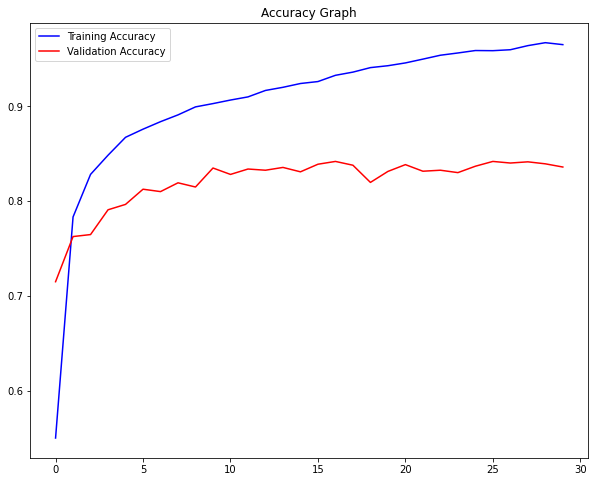

<Figure size 1800x1800 with 0 Axes>

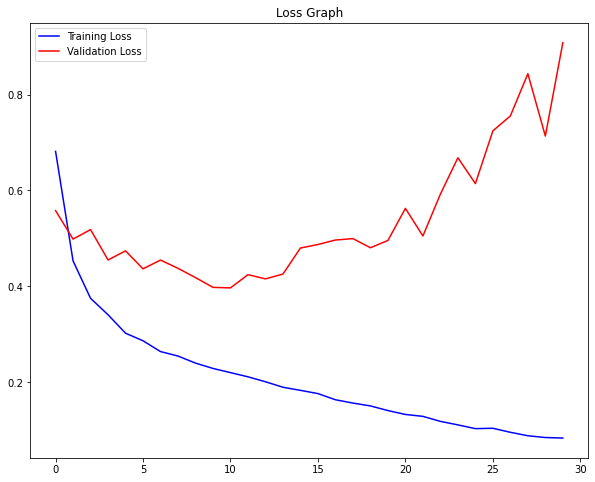

In [21]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.figure(figsize=(10,8))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

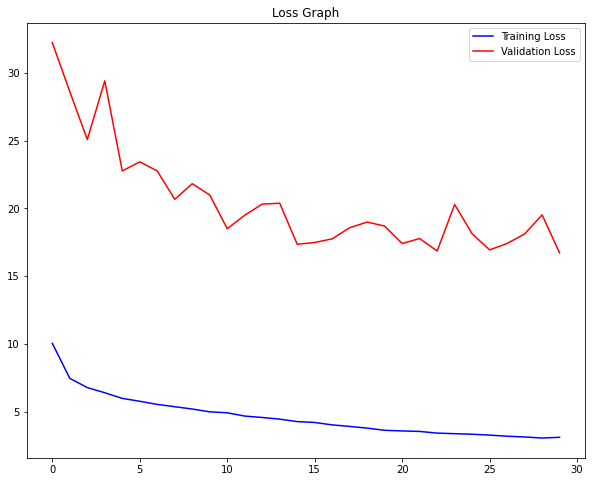

In [22]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 10
Predicted Gender: Male Predicted Age: 16


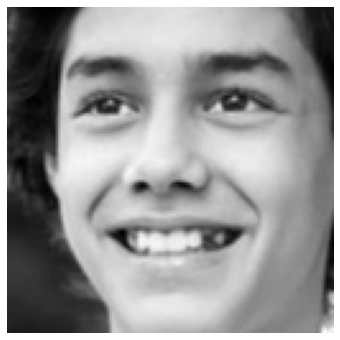

In [30]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.figure(figsize=(8,6))
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 21
Predicted Gender: Male Predicted Age: 21


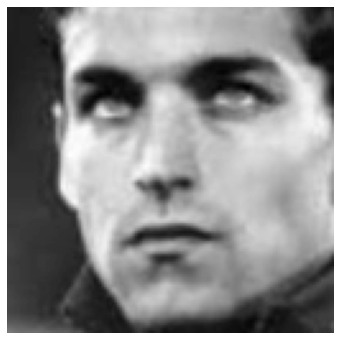

In [24]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.figure(figsize=(8,6))
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 29
Predicted Gender: Female Predicted Age: 33


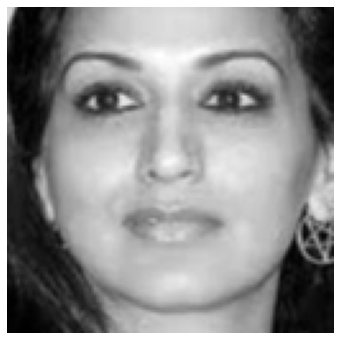

In [25]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.figure(figsize=(8,6))
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [26]:
# %%writefile app.py
# import streamlit as st
# import tensorflow as tf


# @st.cache(allow_output_mutation=True)
# def load_model():
#   model=tf.keras.models.load_model('C:\Users\user\CAPSTONE PROJECT\AgeAndGenderDetection.model')
#   return model
# with st.spinner('Model is being loaded..'):
#   model=load_model()

# st.write("""
#          # Age And Gender Detection
#          """
#          )


# file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
# import cv2
# from PIL import Image, ImageOps
# import numpy as np
# st.set_option('deprecation.showfileUploaderEncoding', False)

# def import_and_predict(image_data, model):
    
#         size = (128, 128)    
#         image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
#         image = np.asarray(image)
#         img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
#         img_reshape = img[np.newaxis,...]
    
#         pred = model.predict(img_reshape.reshape(1, 128, 128, 1))
#         pred_gender = gender_dict[round(pred[0][0][0])]
#         pred_age = round(pred[1][0][0])
        
#         return pred_gender, pred_age
    
# if file is None:
#     st.text("Please upload an image file")
# else:
#     image = Image.open(file)
#     st.image(image, use_column_width=True)
#     predictions = import_and_predict(image, model)
#     score = tf.nn.softmax(predictions[0])
#     st.write(pred_gender)
#     st.write(pred_age)
#     st.write(score)
#     print(
#     "Predicted gender is {} and age is {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

Overwriting app.py
